## Train a model with bike rental data using XGBoost algorithm
### Training log1p(count) dataset
###  Model is trained with XGBoost installed in notebook instance
###  In the later examples, we will train using SageMaker's XGBoost algorithm

In [1]:
# Install xgboost in notebook instance.
#### Command to install xgboost
# !pip install xgboost==1.2

In [2]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# XGBoost 
import xgboost as xgb

In [3]:
column_list_file = 'bike_train_column_list.txt'
train_file = '../data/byke sharing/bike_train_log.csv'
validation_file = '../data/byke sharing/bike_validation_log.csv'
test_file = '../data/byke sharing/bike_test.csv'

In [4]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [5]:
columns

['count',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'month',
 'day',
 'dayofweek',
 'hour']

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,87,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,248,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,334,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,623,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,70,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [8]:
df_validation.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [9]:
X_train = df_train.iloc[:,1:] # Features: 1st column onwards 
y_train = df_train.iloc[:,0].ravel() # Target: 0th column

X_validation = df_validation.iloc[:,1:]
y_validation = df_validation.iloc[:,0].ravel()

In [10]:
# XGBoost Training Parameter Reference: 
#   https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
#regressor = xgb.XGBRegressor(max_depth=5,eta=0.1,subsample=0.7,num_round=150)
regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [11]:
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [12]:
regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_validation, y_validation)])

[0]	validation_0-rmse:200.21253	validation_1-rmse:198.50750
[1]	validation_0-rmse:158.44940	validation_1-rmse:156.82238
[2]	validation_0-rmse:130.70633	validation_1-rmse:129.74683
[3]	validation_0-rmse:113.91983	validation_1-rmse:113.36164
[4]	validation_0-rmse:97.49929	validation_1-rmse:97.96390
[5]	validation_0-rmse:84.68191	validation_1-rmse:86.42600
[6]	validation_0-rmse:75.20273	validation_1-rmse:77.72003
[7]	validation_0-rmse:71.41857	validation_1-rmse:74.25260
[8]	validation_0-rmse:64.23005	validation_1-rmse:67.80524
[9]	validation_0-rmse:61.87001	validation_1-rmse:65.64181
[10]	validation_0-rmse:60.00386	validation_1-rmse:63.93544
[11]	validation_0-rmse:57.38252	validation_1-rmse:61.66847
[12]	validation_0-rmse:55.40470	validation_1-rmse:59.70897
[13]	validation_0-rmse:53.46252	validation_1-rmse:58.07008
[14]	validation_0-rmse:50.16573	validation_1-rmse:55.00782
[15]	validation_0-rmse:49.58626	validation_1-rmse:54.48380
[16]	validation_0-rmse:49.10568	validation_1-rmse:53.95741

[139]	validation_0-rmse:24.81354	validation_1-rmse:41.36809
[140]	validation_0-rmse:24.78586	validation_1-rmse:41.36993
[141]	validation_0-rmse:24.74158	validation_1-rmse:41.36148
[142]	validation_0-rmse:24.62951	validation_1-rmse:41.32304
[143]	validation_0-rmse:24.57401	validation_1-rmse:41.32358
[144]	validation_0-rmse:24.51089	validation_1-rmse:41.28476
[145]	validation_0-rmse:24.42649	validation_1-rmse:41.25937
[146]	validation_0-rmse:24.39769	validation_1-rmse:41.25983
[147]	validation_0-rmse:24.30934	validation_1-rmse:41.26104
[148]	validation_0-rmse:24.20446	validation_1-rmse:41.19978
[149]	validation_0-rmse:24.10522	validation_1-rmse:41.11284


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=150, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [13]:
df_train['count'].describe()

count    7620.000000
mean      191.659318
std       181.693885
min         1.000000
25%        41.000000
50%       144.000000
75%       284.000000
max       977.000000
Name: count, dtype: float64

In [14]:
eval_result = regressor.evals_result()

In [15]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

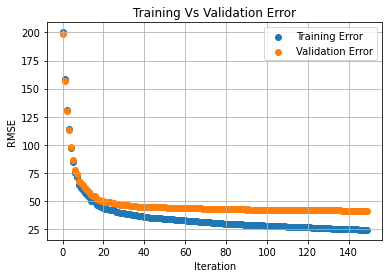

In [16]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

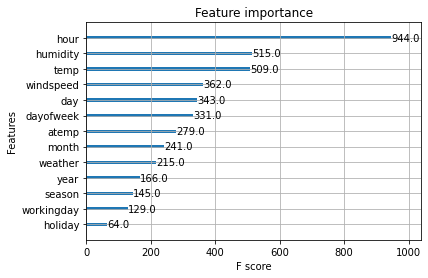

In [17]:
xgb.plot_importance(regressor)
plt.show()

In [18]:
# Updated - Changed to validation dataset
# Compare actual vs predicted performance with dataset not seen by the model before
df = pd.read_csv(validation_file,names=columns)

In [19]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,443,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8
1,387,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13
2,2,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2
3,48,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10
4,55,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8


In [20]:
X_test = df.iloc[:,1:]
print(X_test[:5])

   season  holiday  workingday  weather   temp   atemp  humidity  windspeed  \
0       3        0           1        2  28.70  33.335        79    12.9980   
1       2        0           0        1  32.80  37.880        55    12.9980   
2       1        0           1        1  14.76  16.665        40    19.9995   
3       1        0           1        1   9.02   9.090        47    36.9974   
4       4        0           0        1  10.66  15.150        87     0.0000   

   year  month  day  dayofweek  hour  
0  2011      7    7          3     8  
1  2011      6   11          5    13  
2  2011      2   14          0     2  
3  2011      2    8          1    10  
4  2011     12    4          6     8  


In [34]:
result = regressor.predict(X_test)

In [35]:
result[:5]

array([452.154    , 373.7294   ,   0.7550393,  64.58522  ,  83.32642  ],
      dtype=float32)

In [36]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,2.468627e+192,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,2.333370e+196
1,1.180224e+168,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,2.035244e+162
2,6.389056e+00,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,1.127695e+00
3,7.016736e+20,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,1.119450e+28
4,7.694785e+23,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,1.542432e+36


In [37]:
df['count_predicted'] = result

In [38]:
df.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,2.468627e+192,3,0,1,2,28.70,33.335,79,12.9980,2011,7,7,3,8,452.153992
1,1.180224e+168,2,0,0,1,32.80,37.880,55,12.9980,2011,6,11,5,13,373.729401
2,6.389056e+00,1,0,1,1,14.76,16.665,40,19.9995,2011,2,14,0,2,0.755039
3,7.016736e+20,1,0,1,1,9.02,9.090,47,36.9974,2011,2,8,1,10,64.585220
4,7.694785e+23,4,0,0,1,10.66,15.150,87,0.0000,2011,12,4,6,8,83.326424


In [39]:
# Negative Values are predicted
df['count_predicted'].describe()

count    3266.000000
mean      190.070770
std       174.655914
min       -95.306847
25%        43.720430
50%       150.537590
75%       284.134521
max       901.711853
Name: count_predicted, dtype: float64

In [40]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
99,6.837671e+30,2,0,1,3,22.96,26.515,88,7.0015,2012,5,15,1,23,-1.970791
103,5.987314e+04,3,0,1,2,27.88,31.820,83,12.9980,2012,8,14,1,2,-6.368350
117,6.389056e+00,4,0,1,1,8.20,12.880,80,0.0000,2011,12,13,1,2,-2.282264
137,8.102084e+03,1,0,1,1,15.58,19.695,54,7.0015,2012,3,12,0,2,-6.041607
158,3.493427e+19,1,0,0,2,12.30,13.635,100,19.9995,2011,3,5,5,8,-13.944295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,1.285160e+19,1,0,1,3,13.12,16.665,70,8.9981,2012,2,16,3,10,-5.859625
3176,8.886110e+06,4,0,1,2,12.30,14.395,52,16.9979,2012,11,5,0,4,-2.210038
3199,2.979958e+03,4,0,1,1,13.94,15.910,81,15.0013,2011,11,1,1,4,-1.095656
3252,5.987314e+04,3,0,0,1,25.42,30.305,61,0.0000,2011,7,2,5,4,-1.057944


In [41]:
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [42]:
df['count_predicted'] = df['count_predicted'].map(adjust_count)

In [43]:
df[df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [31]:
df['count'] = df['count'].map(np.expm1)
df['count_predicted'] = df['count_predicted'].map(np.expm1)

C:\WORK\Projects\AWS_sagemker\venv\lib\site-packages\pandas\core\base.py:880: RuntimeWarning: overflow encountered in expm1
  new_values = map_f(values, mapper)


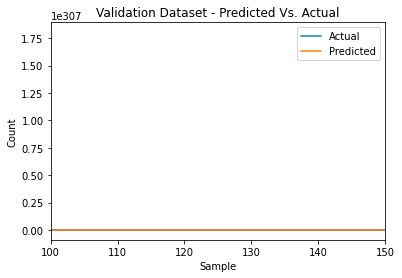

In [32]:
# Actual Vs Predicted
plt.plot(df['count'], label='Actual')
plt.plot(df['count_predicted'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Count')
plt.xlim([100,150])
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

ValueError: supplied range of [-inf, inf] is not finite

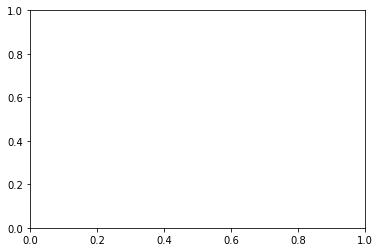

In [33]:
# Over prediction and Under Prediction needs to be balanced
# Training Data Residuals
residuals = (df['count'] - df['count_predicted'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()

In [ ]:
value_counts = (residuals > 0).value_counts(sort=False)
print(' Under Estimation: {0:.2f}'.format(value_counts[True]/len(residuals)))
print(' Over  Estimation: {0:.2f}'.format(value_counts[False]/len(residuals)))

In [ ]:
import sklearn.metrics as metrics
print("RMSE: {0:.2f}".format(metrics.mean_squared_error(df['count'],
                                                    df['count_predicted'])**.5))

In [ ]:
# Metric Use By Kaggle
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
     
    return(np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [ ]:
print("RMSLE: {0:.2f}".format(compute_rmsle(df['count'],df['count_predicted'])))

In [ ]:
# Prepare Data for Submission to Kaggle
df_test = pd.read_csv(test_file,parse_dates=['datetime'])

In [ ]:
df_test.head()

In [ ]:
X_test =  df_test.iloc[:,1:] # Exclude datetime for prediction

In [ ]:
X_test.head()

In [ ]:
result = regressor.predict(X_test)

In [ ]:
result[:5]

In [ ]:
np.expm1(result)

In [ ]:
# Convert result to actual count
df_test["count"] = np.expm1(result)

In [ ]:
df_test.head()

In [ ]:
df_test[df_test["count"] < 0]

In [ ]:
df_test[['datetime','count']].to_csv('predicted_count.csv',index=False)

In [ ]:
# RMSLE (Kaggle) Score
# Test 1: 0.62
# Test 2(log of count): 0.40